In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

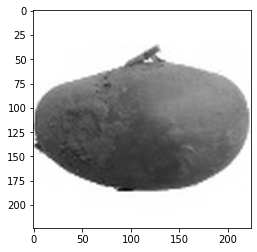

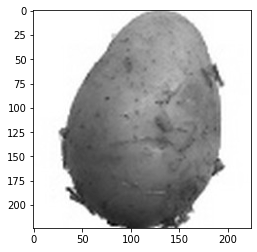

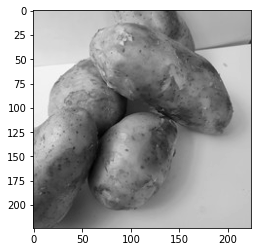

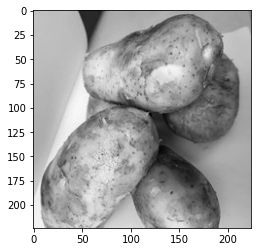

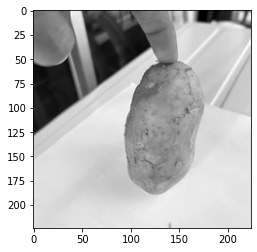

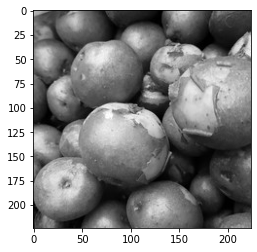

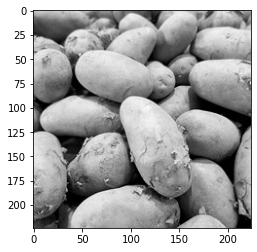

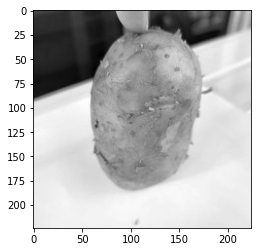

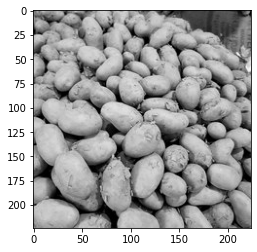

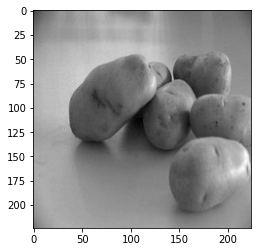

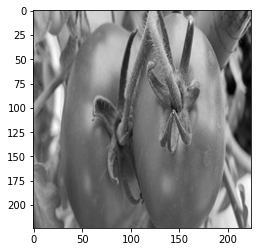

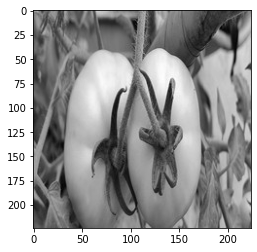

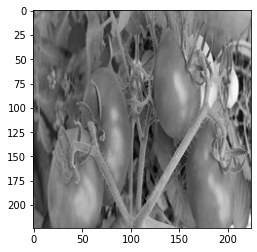

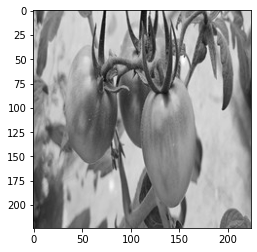

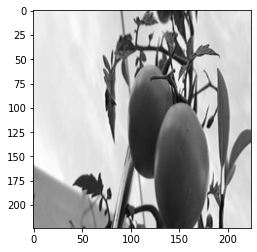

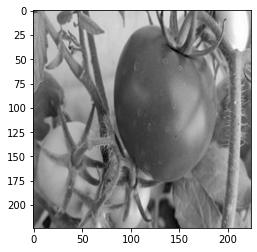

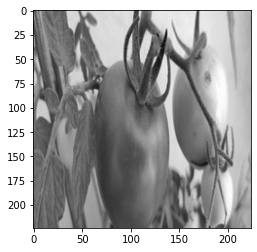

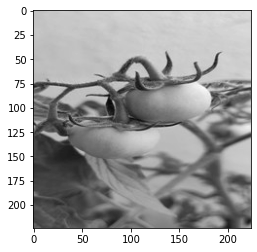

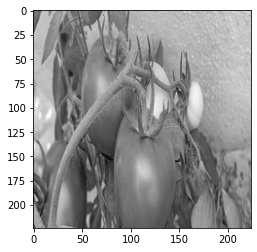

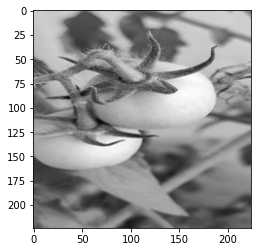

In [18]:
DATADIR = r'/content/drive/MyDrive/Vegetable Images/train'
CATEGORIES = ["Potato", "Tomato"]
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    x=0
    for img in os.listdir(path): 
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        if x==10 : 
            break    

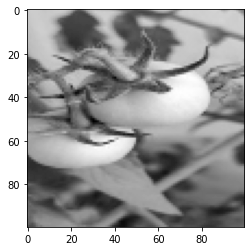

In [19]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [20]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 1000/1000 [00:14<00:00, 69.96it/s]

1966


In [34]:
test_data = []

def create_test_data():
    DATADIR = r'/content/drive/MyDrive/Vegetable Images/test'
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean
                pass
           

create_test_data()

print(len(test_data))

100%|██████████| 200/200 [00:02<00:00, 92.96it/s] 

400


In [35]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
1
1
0


In [36]:
import random
random.shuffle(test_data)
for sample in test_data[:10]:
    print(sample[1])

0
1
1
0
1
1
0
1
0
1


In [37]:
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE)
y_train = np.array(y_train)

[[[[163]
   [171]
   [169]
   ...
   [ 96]
   [101]
   [129]]

  [[152]
   [157]
   [160]
   ...
   [101]
   [150]
   [174]]

  [[138]
   [136]
   [137]
   ...
   [161]
   [168]
   [167]]

  ...

  [[119]
   [118]
   [120]
   ...
   [109]
   [103]
   [109]]

  [[130]
   [110]
   [118]
   ...
   [104]
   [ 95]
   [104]]

  [[ 97]
   [126]
   [110]
   ...
   [103]
   [ 97]
   [ 96]]]]


In [38]:
X_test = []
y_test = []

for features,label in training_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X_train = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE)
y_train = np.array(y_test)

[[[[163]
   [171]
   [169]
   ...
   [ 96]
   [101]
   [129]]

  [[152]
   [157]
   [160]
   ...
   [101]
   [150]
   [174]]

  [[138]
   [136]
   [137]
   ...
   [161]
   [168]
   [167]]

  ...

  [[119]
   [118]
   [120]
   ...
   [109]
   [103]
   [109]]

  [[130]
   [110]
   [118]
   ...
   [104]
   [ 95]
   [104]]

  [[ 97]
   [126]
   [110]
   ...
   [103]
   [ 97]
   [ 96]]]]


In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dense(32, activation=tf.nn.relu),
    # keras.layers.Dense(512, activation=tf.nn.relu),
    # keras.layers.Dense(256, activation=tf.nn.relu),
    # keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:


model.fit(X_train, y_train, epochs=10)

Epoch 1/10
62/62 [==============================] - 6s 78ms/step - loss: 324.2604 - accuracy: 0.5346
Epoch 2/10
62/62 [==============================] - 6s 89ms/step - loss: 88.4308 - accuracy: 0.6246
Epoch 3/10
62/62 [==============================] - 4s 72ms/step - loss: 24.5857 - accuracy: 0.6714
Epoch 4/10
62/62 [==============================] - 4s 67ms/step - loss: 11.0792 - accuracy: 0.7152
Epoch 5/10
62/62 [==============================] - 6s 97ms/step - loss: 7.8394 - accuracy: 0.7187
Epoch 6/10
62/62 [==============================] - 4s 68ms/step - loss: 9.4282 - accuracy: 0.6994
Epoch 7/10
62/62 [==============================] - 4s 67ms/step - loss: 8.1603 - accuracy: 0.7004
Epoch 8/10
62/62 [==============================] - 5s 88ms/step - loss: 7.3073 - accuracy: 0.6760
Epoch 9/10
62/62 [==============================] - 5s 77ms/step - loss: 4.8575 - accuracy: 0.6867
Epoch 10/10
62/62 [==============================] - 4s 68ms/step - loss: 3.2199 - accuracy: 0.7447


In [50]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
test_loss, test_acc = model.evaluate(X_test,y_test)
test_acc


62/62 [==============================] - 1s 13ms/step - loss: 4.0045 - accuracy: 0.6226


0.6225839257240295

In [51]:
import numpy as np
output= model.predict(X_test)
y_pred=np.argmax (output, axis=1)

62/62 [==============================] - 1s 14ms/step


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.24      0.98      0.38       232
           1       1.00      0.57      0.73      1734

    accuracy                           0.62      1966
   macro avg       0.62      0.78      0.55      1966
weighted avg       0.91      0.62      0.69      1966



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[228 738]
 [  4 996]]
